In [1]:
from data_processor import DataProcessor
import torch 
import torch.nn as nn
from torch.optim import Adam
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [3]:
file_1 = "../data/Train.csv"
file_2 = "../data/additional_data/trainRoot_edited.csv"

processor = DataProcessor(file_1, file_2, test = False, minimal = True)
x_train, x_valid, y_train, y_valid = processor.get_numpy_data(fillna = True, additional = True,
                                                                            encode = True, np_split = True, enocde_user = False,
                                                                            normalize = True, drop_ones = True)

In [2]:
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

In [5]:
x_train = torch.tensor(x_train).float().to(device)
x_valid = torch.tensor(x_valid).float().to(device)
y_train = torch.tensor(y_train).float().to(device)
y_valid = torch.tensor(y_valid).float().to(device)

In [6]:
file_1 = "../data/Test.csv"
file_2 = "../data/additional_data/testRoot_edited.csv"

processor = DataProcessor(file_1, file_2, test = True, minimal = True)
x_test = processor.get_numpy_data(fillna = True, additional = True,
                                  encode = True, np_split = False, enocde_user = False,
                                  normalize = True, drop_ones = False)

In [7]:
batch_size = int (len(x_train)/25)
n_epochs = 50000

NameError: name 'x_train' is not defined

In [ ]:
linear_regressor = nn.Linear(in_features = len(x_train[0]), out_features = 1)

In [ ]:
train_losses = []
valid_losses = []

def train(model):
    model.to(device)
    cirterion = nn.MSELoss()
    learning_rate = .02
    optimizer = Adam(model.parameters(), lr = learning_rate)
    old_loss = 590720.5
    
    for i in range (n_epochs): 
        for b in range(0, len(x_train), batch_size):
            predictions = model(x_train[b:b+batch_size])
            loss = cirterion(predictions, y_train[b:b+batch_size])

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_losses.append(loss.item())
            
            val_preds = model(x_valid)
            valid_loss = cirterion(val_preds.detach(), y_valid.detach())
            valid_losses.append(valid_loss.detach().item()) 

        if i % 500 == 0: 
            print("The loss after 500 epoch is: ", loss.item())
            
        if i % 5000 == 0:
            learning_rate /= 1.5
            print("The learning rate now is: ", learning_rate)
            old_loss = loss.item()
            optimizer = Adam(model.parameters(), lr = learning_rate)
            torch.save(neural_regressor.state_dict(), "models/working_trained_regressor_"+str(i))
                

In [10]:
neural_regressor = nn.Sequential(
nn.Linear(in_features = len(x_test[0]), out_features = 10),
nn.ReLU(),
nn.BatchNorm1d(10),    
nn.Linear(in_features = 10, out_features = 10), 
nn.ReLU(),
nn.BatchNorm1d(10),
nn.Linear(in_features = 10, out_features = 10), 
nn.ReLU(),
nn.BatchNorm1d(10),
nn.Linear(in_features = 10, out_features = 10), 
nn.ReLU(),
nn.BatchNorm1d(10),
nn.Linear(in_features = 10, out_features = 1))

In [11]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

In [12]:
neural_regressor.apply(init_weights)

C:\Users\hp\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Sequential(
  (0): Linear(in_features=26, out_features=10, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=10, out_features=10, bias=True)
  (4): ReLU()
  (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): ReLU()
  (8): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=10, out_features=10, bias=True)
  (10): ReLU()
  (11): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#train(neural_regressor)

In [28]:
#params = torch.load("models/trained_regressor_1", map_location={'cuda:0': 'cpu'})
#neural_regressor.state_dict = params

In [29]:
predictions = neural_regressor(x_train)

In [30]:
def evaluate(model, x, y): 
    predictions = model(x).detach().cpu().numpy().reshape(-1)
    #predictions = torch.tensor([1500.]*len(y))
    y = y.cpu().numpy().reshape(-1)
    error = mean_squared_error(y, predictions)
    var = np.var(y)
    print("The MSE error is: ", error)
    print("The variance of the validation set is: ", var)
    r_2 = 1 - error / var 

    print("The model explians " ,r_2 , " of the variance in data")


In [31]:
evaluate(neural_regressor, x_train, y_train)
evaluate(neural_regressor, x_valid, y_valid)

The MSE error is:  576662.06
The variance of the validation set is:  929675.94
The model explians  0.3797171115875244  of the variance in data
The MSE error is:  622474.4
The variance of the validation set is:  938960.6
The model explians  0.33706021308898926  of the variance in data


In [32]:
# processor = DataProcessor("../data/Test.csv", test = True)
# x_test = processor.get_numpy_data(True, True, True, False, True)

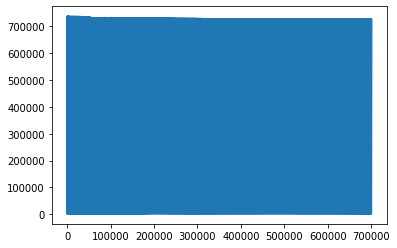

In [39]:
plt.plot(train_losses[600000:])
plt.show()

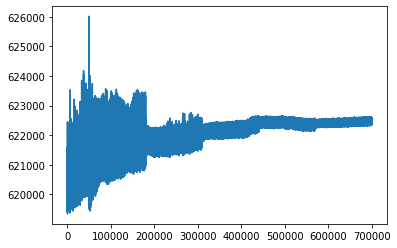

In [40]:
plt.plot(valid_losses[600000:])
plt.show()

In [43]:
print(predictions.mean())
print(predictions.std())

tensor(1612.3469, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(599.4996, device='cuda:0', grad_fn=<StdBackward0>)


In [57]:
params = torch.load("models/working_trained_regressor_45000", map_location={'cuda:0': 'cpu'})

pretrained_dict = params
model_dict = neural_regressor.state_dict

model_dict.update(pretrained_dict) 


In [58]:
preds = np.matrix(neural_regressor(torch.tensor(x_test).float().to(device)).detach().cpu()).reshape(-1,1)

In [62]:
print(preds)


[[ 1422.69909668]
 [ 1343.86047363]
 [ 1026.1809082 ]
 ..., 
 [ 1558.3651123 ]
 [ 1969.49499512]
 [ 1573.23791504]]


In [63]:
np.savetxt("../data/submissions/test_preds.csv", preds, delimiter="\n", fmt='%4.2f')